In [51]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

In [52]:
df = pd.read_csv('./Titanic-Dataset.csv')

df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

df['Survived'] = df['Survived'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype('category')
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df['AgeGroup'] = df['AgeGroup'].astype('category')

In [53]:
df.describe()

,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208,1.904602
std,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.420000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,0.000000,0.000000,7.910400,1.000000
50%,28.000000,0.000000,0.000000,14.454200,1.000000
75%,35.000000,1.000000,0.000000,31.000000,2.000000
max,80.000000,8.000000,6.000000,512.329200,11.000000


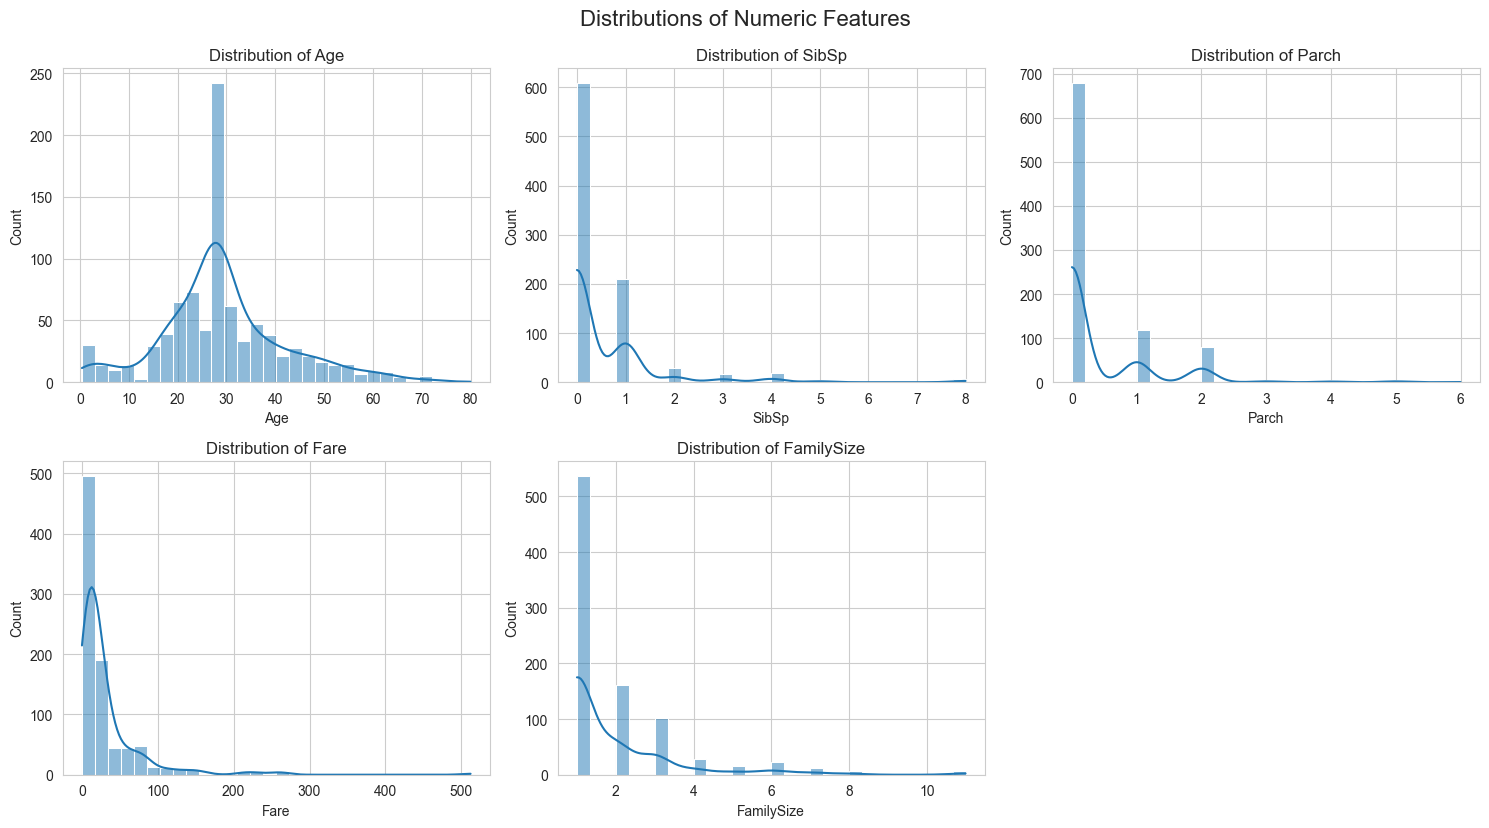

In [54]:
sns.set_style("whitegrid")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distributions of Numeric Features", fontsize=16, y=1.03)
plt.show()  
plt.close()

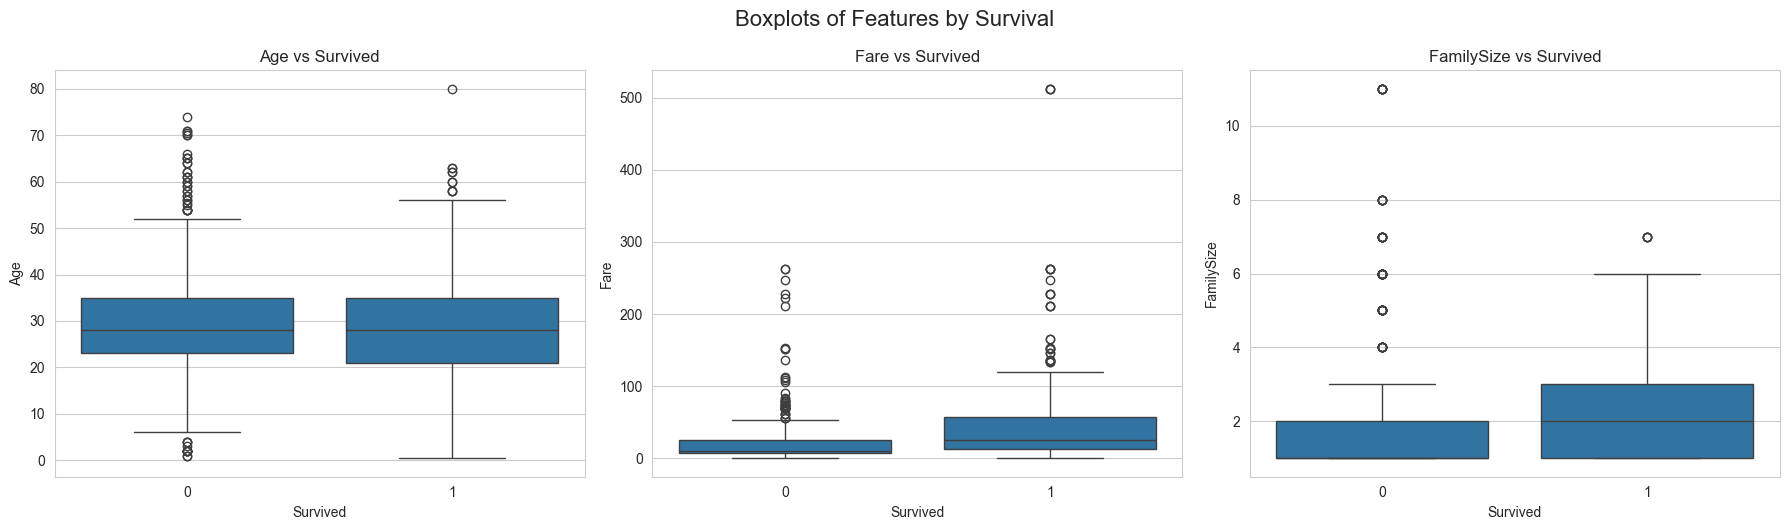

In [ ]:
boxplot_cols = ['Age', 'Fare', 'FamilySize']

fig, axes = plt.subplots(1, len(boxplot_cols), figsize=(18, 5))

for i, col in enumerate(boxplot_cols):
    sns.boxplot(data=df, x='Survived', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Survived')

plt.tight_layout()
plt.suptitle("Boxplots of Features by Survival", fontsize=16, y=1.05)
plt.show()
plt.close()

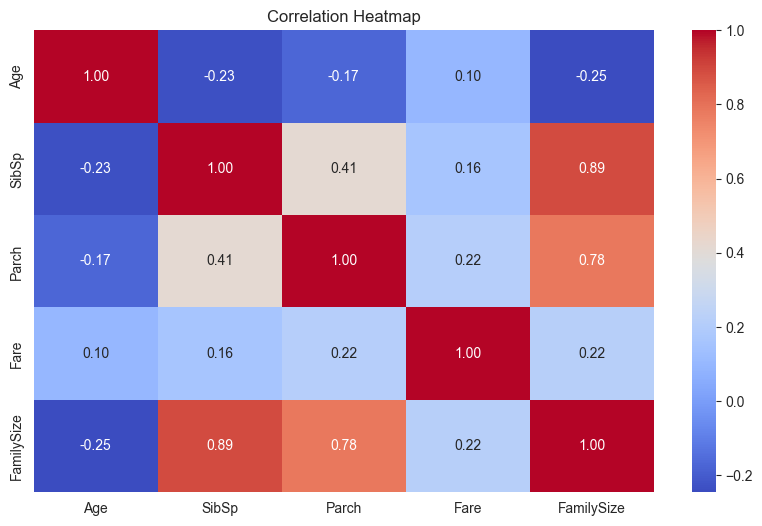

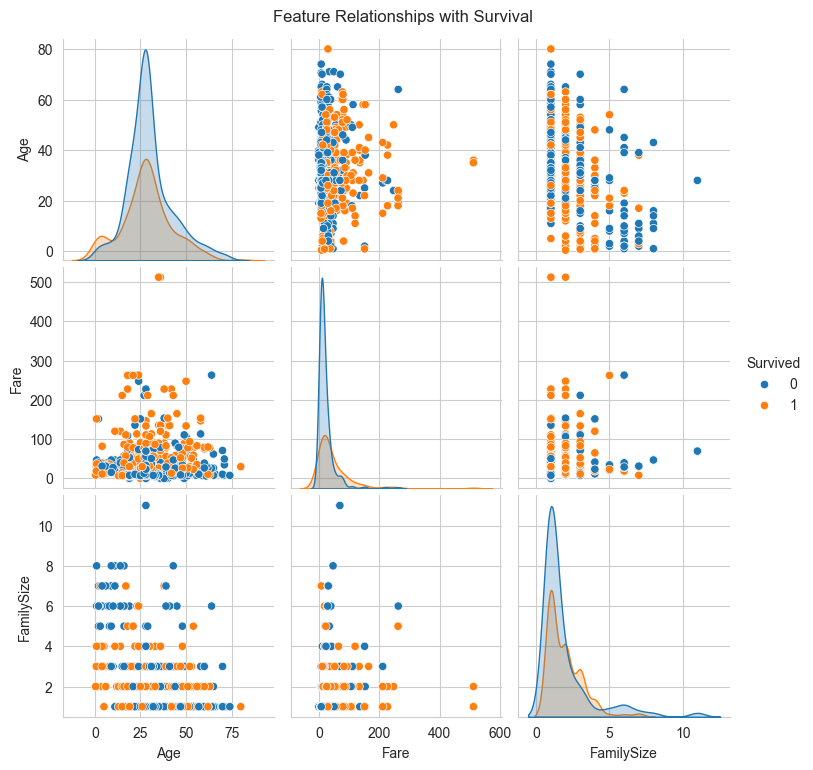

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
plt.close()

sns.pairplot(df, vars=['Age', 'Fare', 'FamilySize'], hue='Survived', diag_kind='kde')
plt.suptitle('Feature Relationships with Survival', y=1.02)
plt.show()
plt.close()

In [57]:
fig = px.histogram(df, x='Pclass', color='Sex', barmode='group',
                   facet_col='Survived', title='Survival by Pclass and Sex')
fig.show()

fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 hover_data=['Sex', 'Pclass'], title='Fare vs Age (Survival)')
fig.show()